## Funnel Analysis

I came across a few small datasets from an unknown e-commerce company and thought that it would be fun to conduct a funnel analysis to understand visitor pregression through the purchasing process.  
  
I begin by loading and inspecting the datasets to assess their structure and content.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
purchase = pd.read_csv('purchase.csv')
visits = pd.read_csv('visits.csv')
cart = pd.read_csv('cart.csv')
checkout = pd.read_csv('checkout.csv')

In [59]:
print(cart.shape)
cart.head(5)

(348, 2)


,user_id,cart_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00


In [60]:
print(checkout.shape)
checkout.head(5)

(226, 2)


,user_id,checkout_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:52:00


In [61]:
print(purchase.shape)
purchase.head(5)

(252, 2)


,user_id,purchase_time
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11 04:25:00
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05 08:45:00
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20 20:49:00
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22 15:18:00
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11 11:32:00


In [62]:
print(visits.shape)
visits.head(5)

(2000, 2)


,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


#### Cart Engagement Analysis
With the datasets loaded, the next objective was to determine what proportion of visitors who did not add any items to their shopping cart. To do this, a left join was performed between the *visits* and *cart* datasets, ensuring all *visit* records were preserved while *cart* activity was attached where available. Visitors without a corresponding cart timestamp were therefore identified as users who did not plae any items in their cart.  
  
The merged dataset contains 2,000 visit records, of which 1,652 show no associated cart activity, indicating that 82.6% of visitors did not add any items to their shopping cart, while only 17.4% progressed to the next stage of the funnel.  
  
This finding highlightd a substantial drop-off early in the conversion funnel, suggesting that most visitors leave the site before demonstrating strong purchase intent. Contributing factors may include browsing without intent to purchase, product selection, price points, or user experience. 

In [63]:
visit_cart = pd.merge(visits, cart, how='left')
print("Number of observations: ", len(visit_cart))
visit_cart.head(5)

Number of observations:  2000


,user_id,visit_time,cart_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaN
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaN
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaN


In [64]:
null = len(visit_cart[visit_cart.cart_time.isnull()])
no_cart = round((null / len(visit_cart)) * 100, 2)
print("Number of shoppers who did not place an item in their shopping cart: ", null)
print('Percentage of shoppers who did not place an item in their shopping cart: ', no_cart, '%')

Number of shoppers who did not place an item in their shopping cart:  1652
Percentage of shoppers who did not place an item in their shopping cart:  82.6 %


#### Cart Abandonment Analysis
The next stage of the analysis evaluates the proportion of visitors who added items to their cart but failed to proceed to checkout. To measure this, a left join was performed between the *cart* and *checkout* datasets, preserving all observations with cart activity while attaching checkout information where available. Observations lacking a checkout timestamp are classified as a abandoned carts.  
  
The resulting dataset contains 348 observations in which a visitor placed items in their shopping cart. Of these, 122 observations did not progress to checkout, indicating a cart abandonment rate of 35.06%  
  
This represents a significant point of drop-off, as these visitors have demonstrated an intent to purchase. Cart abandonment can stem from several factors, including unexpected costs, coonfusing checkout processes, and account creation requirements. Further investigation into pricing presentation and checkout experience may identify opportunities to improve conversion performance.

In [65]:
cart_checkout = pd.merge(cart, checkout, how='left')
print("Number of observations: ", len(cart_checkout))
cart_checkout.head(5)

Number of observations:  348


,user_id,cart_time,checkout_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00,2017-11-07 21:14:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00,NaN
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00,2017-03-04 11:04:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00,2017-09-27 08:26:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00,NaN


In [66]:
null_cart_checkout = len(cart_checkout[cart_checkout.checkout_time.isnull()])
no_checkout = round((null_cart_checkout / len(cart_checkout) * 100), 2)
print("Number of abandoned carts: ", null_cart_checkout)
print("Percentage of shoppers who abandoned their cart: ", no_checkout, "%")

Number of abandoned carts:  122
Percentage of shoppers who abandoned their cart:  35.06 %


#### Checkout Abandonment Analysis
This section focuses on visitors who progressed to the checkout stage but ultimately did not complete the purchase. To evaluate this behavior, the *visits*, *cart*, *checkout*, and *purchase* datasets were merged to track user movement through each stage of the funnel. Observations with a checkout timestamp but lacking a corresponding purchase timestamp are classified as checkout abandonments.  

The analysis shows that 334 visitors reached the checkout stage, of which 82 did not complete their purchase, producing a checkout abandonment rate of 24.55%.  

Although abandonment at this stage is lower than in earlier stages, it is still significant because the visitors at checkout have demonstrated strong purchase intent. Potential drivers of abandonment may include payment processing issues, unexpected costs, and shipping concerns. Further investigation into checkout flow performance, accepted payment options, and pricing transparency may identify opportunities to improve conversion performance.   

In [67]:
all_data = visit_cart.merge(cart_checkout, how='left').merge(purchase, how='left')
all_data.head(5)

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaN,NaN,NaN
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaN,NaN
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaN,NaN,NaN
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaN,NaN,NaN


In [68]:
checkout_no_purchase = len(all_data[(~all_data.checkout_time.isnull()) & (all_data.purchase_time.isnull())])
checkout_no_purchase_percent = round((checkout_no_purchase / len(all_data[~all_data.checkout_time.isnull()]) * 100), 2)
print("Total number of shoppers who proceeded to checkout: ", len(all_data[~all_data.checkout_time.isnull()]))
print("Number of shoppers who proceeded to checkout but did not purchase: ", checkout_no_purchase)
print("Percentage of shoppers who proceeded to checkout but did not purchase: ", checkout_no_purchase_percent, "%")

Total number of shoppers who proceeded to checkout:  334
Number of shoppers who proceeded to checkout but did not purchase:  82
Percentage of shoppers who proceeded to checkout but did not purchase:  24.55 %


#### Time to Purchase Analysis
In this section, the analysis focuses on estimating the average time visitors spend on the site before completing a purchase. To compute this metric, records were filtered to include only sections where both visit and purchase timestamps were available, ensuring that incomplete sessions did not influence the results. The visit and purchase timestamps were converted to datetime format, and the time elapsed between the initial visit and the final purchase was calculated for each observation.  
  
The results indicate that, on average, users complete a purchase approximately 43 minutes after arriving on the site, suggesting that conversions typically occur in a single browsing session rather than through repeated visits.  
  
Future analysis could explore the distribution of purchase times, differences across customer segments, and how *time_to_purchase* varies by traffic source and time of day. Such analysis would provide deeper insight into user behavior and identify improvements for the conversion funnel.

In [69]:
all_data_copy = all_data.copy()
all_data_copy = all_data_copy[(~all_data_copy.visit_time.isnull()) & (~all_data_copy.purchase_time.isnull())].reset_index()
all_data_copy['visit_time'] = pd.to_datetime(all_data_copy['visit_time'])
all_data_copy['purchase_time'] = pd.to_datetime(all_data_copy['purchase_time'])
all_data_copy['time_to_purchase'] = all_data_copy.purchase_time - all_data_copy.visit_time
print("Avg time spent from time of visit to time of purchase: ", all_data_copy.time_to_purchase.mean())
all_data_copy.head(5)

Avg time spent from time of visit to time of purchase:  0 days 00:43:12.380952380


,index,user_id,visit_time,cart_time,checkout_time,purchase_time,time_to_purchase
0,1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00,0 days 00:44:00
1,14,486480e2-98c3-4d51-8f4b-b1c07228ce84,2017-01-27 16:34:00,2017-01-27 16:44:00,2017-01-27 17:10:00,2017-01-27 17:12:00,0 days 00:38:00
2,48,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00,0 days 00:41:00
3,49,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:21:00,0 days 01:00:00
4,65,ab0125fc-9493-4f59-ad70-24ad264a3a0c,2017-11-18 03:21:00,2017-11-18 03:33:00,2017-11-18 03:57:00,2017-11-18 04:21:00,0 days 01:00:00


Expanding on my previous thought to explore the distribution of purchase times and in an effort to identify whether certain times of day are associated with higher purchase activity, I decided to plot the number of visits which converted into a purchase, grouped by the hour in which the visit began, as well as the conversion rate $(\frac{\text{Purchases per hour}}{\text{Visits per hour}})$.

distinct hours:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


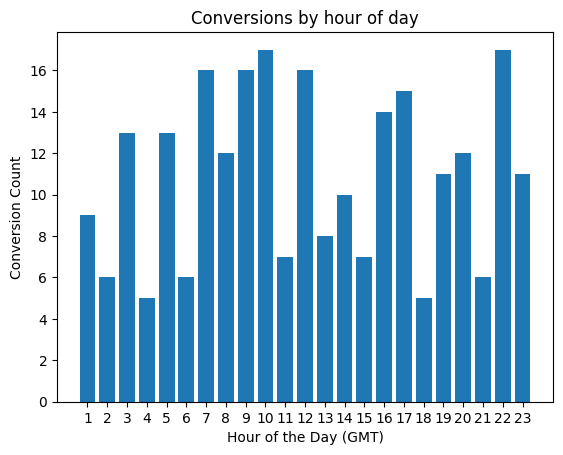

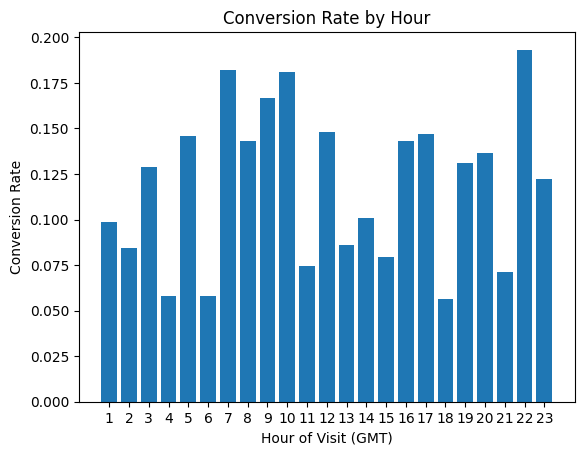

In [103]:
# Plot number of conversions grouped by hour of day

all_data_copy['hour'] = all_data_copy['visit_time'].dt.hour
hour_counts = all_data_copy['hour'].value_counts().sort_index()
print("distinct hours: ", hour_counts.index.to_list())
plt.bar(hour_counts.index, hour_counts.values)
plt.xticks(range(1, 24))
plt.xlabel('Hour of the Day (GMT)')
plt.ylabel('Conversion Count')
plt.title("Conversions by hour of day")
plt.show()

# -------------------------------------------------------------------------------------
# Compute and plot conversion rate by hour of day

visits['hour'] = pd.to_datetime(visits['visit_time']).dt.hour
visit_purchase = visits.merge(purchase, how='left')
visits_per_hour = visit_purchase['hour'].value_counts().sort_index()

converted = visit_purchase[visit_purchase['purchase_time'].notnull()]
purchases_per_hour = converted['hour'].value_counts().sort_index()

conversion_rate = purchases_per_hour / visits_per_hour
conversion_rate = conversion_rate.fillna(0)

plt.bar(conversion_rate.index, conversion_rate.values)
plt.xticks(range(1, 24))
plt.xlabel('Hour of Visit (GMT)')
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Hour")
plt.show()

To better understand purchasing behavior, I examined the distribution of completed purchases by month. The results suggest some variation in purchase activity throughout the year, with certain months exhibiting higher purchase counts than others. Notably, December is absent from the dataset, preventing a full assessment of potential seasonal effects at the end of the year. If December followed patterns similar to higher-activity months such as January and November, it could indicate seasonal influences in customer behavior.  
   
All observations in the dataset were collected in 2017, so the analysis only reflects patterns within a single yearrather than long term trends. Additionally, the dataset includes activity from 11 distinct months and only 28 unique days of the month, suggesting that the data represents only a partial sampling of the user activity ratheer than complete coverage of the entire calendar year. Consequently, while the results may hint at possible seasonal patterns, additional data would be needed to draw firm conclusions about month-to-month purchasing behavior. 

In [71]:
all_data_purchase = all_data.copy()
all_data_purchase = all_data_purchase[~all_data_purchase.purchase_time.isnull()]
all_data_purchase['visit_time'] = pd.to_datetime(all_data_purchase['visit_time'])
all_data_purchase['purchase_time'] = pd.to_datetime(all_data_purchase['purchase_time'])
all_data_purchase['day'] = all_data_purchase['purchase_time'].dt.day
all_data_purchase['month'] = all_data_purchase['purchase_time'].dt.month
all_data_purchase['year'] = all_data_purchase['purchase_time'].dt.year

print(all_data_purchase['year'].nunique())
print(all_data_purchase['month'].nunique())
print(all_data_purchase['day'].nunique())
all_data_purchase.head(5)

1
11
28


,user_id,visit_time,cart_time,checkout_time,purchase_time,day,month,year
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00,26,1,2017
14,486480e2-98c3-4d51-8f4b-b1c07228ce84,2017-01-27 16:34:00,2017-01-27 16:44:00,2017-01-27 17:10:00,2017-01-27 17:12:00,27,1,2017
48,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:02:00,8,1,2017
49,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:21:00,2017-01-08 20:38:00,2017-01-08 20:52:00,2017-01-08 21:21:00,8,1,2017
65,ab0125fc-9493-4f59-ad70-24ad264a3a0c,2017-11-18 03:21:00,2017-11-18 03:33:00,2017-11-18 03:57:00,2017-11-18 04:21:00,18,11,2017


month
1     29
2     18
3     21
4     24
5     35
6     21
7     16
8     21
9     21
10    16
11    30
Name: count, dtype: int64


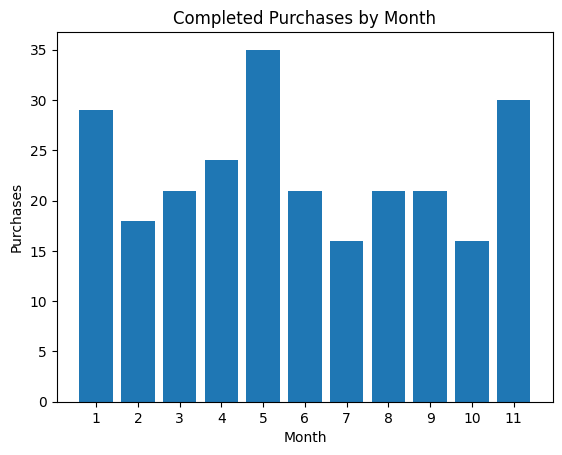

In [72]:
month_counts = all_data_purchase['month'].value_counts().sort_index()
print(month_counts)
plt.bar(month_counts.index, month_counts.values)
plt.xlabel("Month")
plt.ylabel('Purchases')
plt.title('Completed Purchases by Month')
plt.xticks(range(1,12))
plt.show()

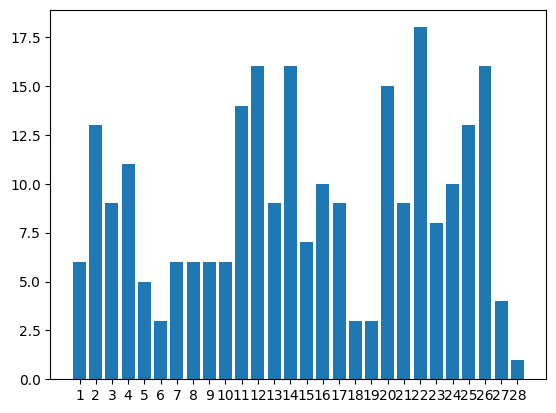

In [73]:
day_counts = all_data_purchase['day'].value_counts().sort_index()
plt.bar(day_counts.index, day_counts.values)
plt.xticks(range(1,29))
plt.show()